## Exercício de Regressão Múltipla – Happiness Dataset

O banco de dados “happiness.xls” contém dados de grau de felicidade de 122 países.
Objetivo: prever o escore de felicidade com base nas variáveis:
- Hemisfério
- HDI
- GDP per capita
- Consumo de cerveja, álcool e vinho per capita

In [81]:
# Importando pacotes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
from scipy.stats import shapiro
!pip install statsmodels
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
# Importando base 
df = pd.read_excel("C:\\Users\\Gabi\\Documents\\GitHub\\portfolio-ml\\reg_multipla\\p38a.xlsx")  # ou o caminho do seu arquivo

df.head()

,ID,EDUCAÇÃO,CARGO,LOCAL,IDADE,TEMPOCASA,SALARIO
0,SI_01,SECUNDÁRIO,GERENTE,INTERIOR,30,1,4279.5
1,SI_02,SUPERIOR,AUXILIAR,INTERIOR,32,4,4575.4
2,SI_03,SECUNDÁRIO,AUXILIAR,CAPITAL,33,2,4735.6
3,SI_04,SUPERIOR,GERENTE,INTERIOR,34,3,4863.1
4,SI_05,SECUNDÁRIO,GERENTE,INTERIOR,36,1,5355.8


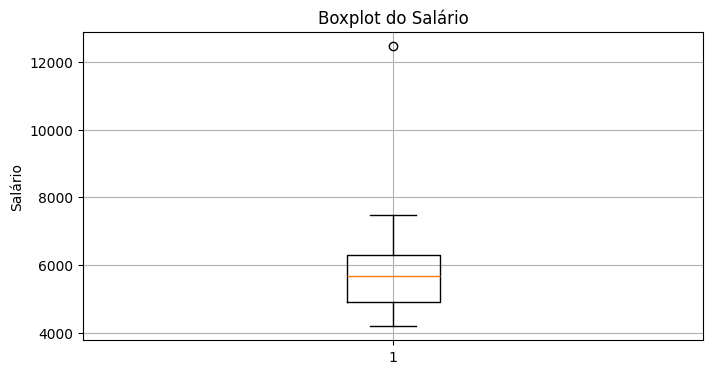

In [83]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['SALARIO'])
plt.title("Boxplot do Salário")
plt.ylabel("Salário")
plt.grid(True)
plt.show()


Q1 = df['SALARIO'].quantile(0.25)
Q3 = df['SALARIO'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['SALARIO'] >= limite_inferior) & (df['SALARIO'] <= limite_superior)]

In [84]:
# Garantir que os nomes das colunas não tenham espaços extras e sejam consistentes
df.columns = df.columns.str.strip().str.upper()

# Criando variáveis dummy
df['educacaoSUPERIOR'] = df['EDUCAÇÃO'].apply(lambda x: 1 if x.upper() == 'SUPERIOR' else 0)
df['cargoDIRETOR'] = df['CARGO'].apply(lambda x: 1 if x.upper() == 'DIRETOR' else 0)
df['cargoGERENTE'] = df['CARGO'].apply(lambda x: 1 if x.upper() == 'GERENTE' else 0)
df['localINTERIOR'] = df['LOCAL'].apply(lambda x: 1 if x.upper() == 'CAPITAL' else 0)

In [85]:
# Separar variável x e y
X = df[['IDADE', 'TEMPOCASA', 'educacaoSUPERIOR', 'cargoDIRETOR', 'cargoGERENTE', 'localINTERIOR']]
y = df['SALARIO']

In [86]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [87]:
# Prever e avaliar o modelo
y_pred = modelo.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE:", round(mae,2))
print(f"MSE:", round(mse,2))
print(f"R2:", round(r2,2))

MAE: 329.72
MSE: 134164.66
R2: 0.82


In [88]:
# O modelo
# Exibir fórmula do modelo com todos os coeficientes
coeficientes = dict(zip(X.columns, modelo.coef_))
for nome, valor in coeficientes.items():
    print(f"{nome}: {valor:.4f}")
print(f"Intercepto: {modelo.intercept_:.2f}")

IDADE: 19.1446
TEMPOCASA: 71.7438
educacaoSUPERIOR: 85.1645
cargoDIRETOR: 661.7416
cargoGERENTE: 381.7678
localINTERIOR: -81.7110
Intercepto: 3724.64


✅ Normalidade (Shapiro-Wilk): estatística = 0.9228, p-valor = 0.1872
✅ Independência dos erros (Durbin-Watson): 1.2393


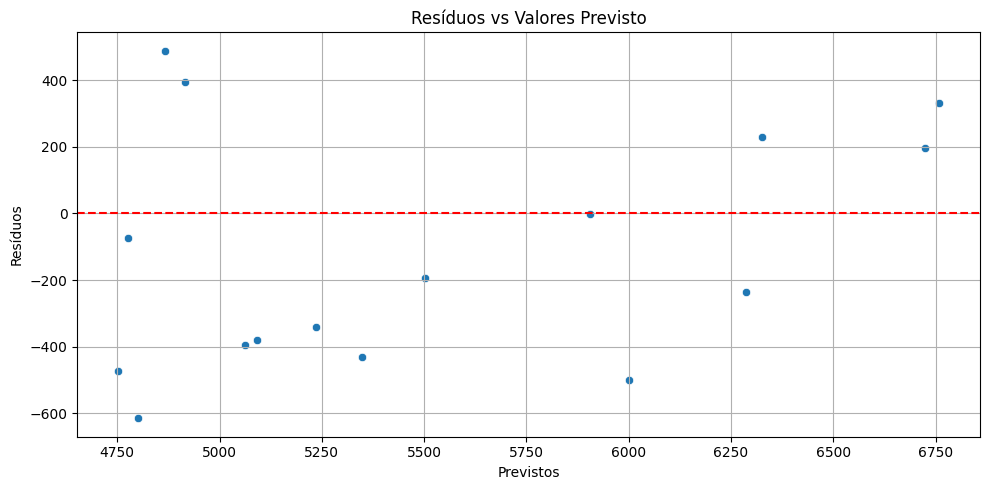

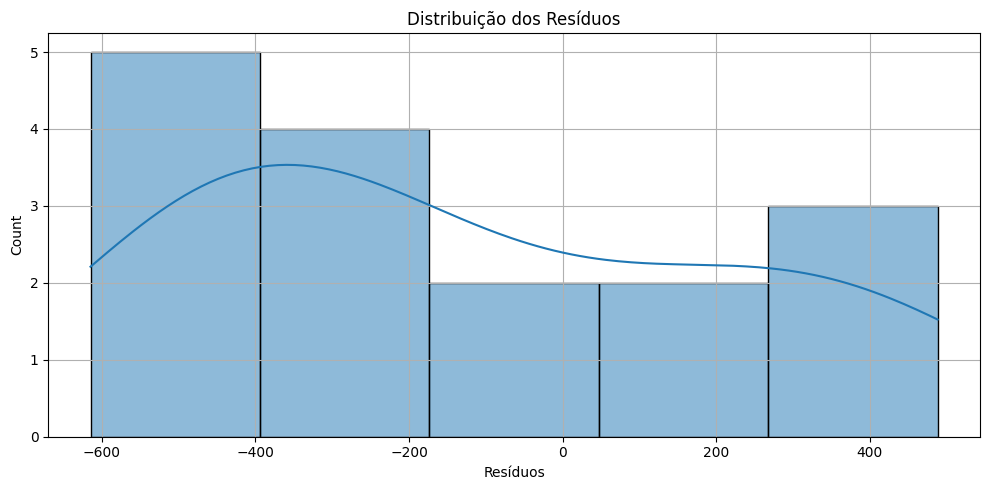

                            OLS Regression Results                            
Dep. Variable:                SALARIO   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     59.07
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           7.62e-26
Time:                        15:28:31   Log-Likelihood:                -574.69
No. Observations:                  79   AIC:                             1163.
Df Residuals:                      72   BIC:                             1180.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3686.4635    295.792  

In [ ]:
def verificar_suposicoes(modelo, X_test, y_test):
    # Previsões e resíduos
    y_pred = modelo.predict(X_test)
    residuos = y_test - y_pred

    # Teste de normalidade
    estat, p = shapiro(residuos)
    print(f"✅ Normalidade (Shapiro-Wilk): estatística = {estat:.4f}, p-valor = {p:.4f}")

    # Teste de independência
    dw = durbin_watson(residuos)
    print(f"✅ Independência dos erros (Durbin-Watson): {dw:.4f}")

    # Gráfico de homocedasticidade
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=y_pred, y=residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Resíduos vs Valores Previsto")
    plt.xlabel("Previstos")
    plt.ylabel("Resíduos")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Histograma dos resíduos
    plt.figure(figsize=(10, 5))
    sns.histplot(residuos, kde=True)
    plt.title("Distribuição dos Resíduos")
    plt.xlabel("Resíduos")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

verificar_suposicoes(modelo, X_test, y_test)



In [ ]:
# 7. Adicionar constante (intercepto)
X = sm.add_constant(X)

# 8. Criar e treinar o modelo
modelo = sm.OLS(y, X).fit()

# 9. Mostrar resumo com coeficientes, p-valores, R² etc.
print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:                SALARIO   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     59.07
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           7.62e-26
Time:                        15:28:49   Log-Likelihood:                -574.69
No. Observations:                  79   AIC:                             1163.
Df Residuals:                      72   BIC:                             1180.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3686.4635    295.792  

In [ ]:

def analisar_significancia(modelo, alpha=0.05):
    """
    Mostra a significância estatística das variáveis de um modelo statsmodels.
    """
    print("\n📊 Análise de Significância (nível de significância =", alpha, ")\n")
    pvalores = modelo.pvalues
    coeficientes = modelo.params

    for var in pvalores.index:
        p = pvalores[var]
        coef = coeficientes[var]
        if p < alpha:
            print(f"✅ '{var}': SIGNIFICANTE (p = {p:.4f}) | Impacto: {coef:.2f}")
        else:
            print(f"❌ '{var}': NÃO significante (p = {p:.4f}) | Impacto: {coef:.2f}")

analisar_significancia(modelo)


            



📊 Análise de Significância (nível de significância = 0.05 )

✅ 'const': SIGNIFICANTE (p = 0.0000) | Impacto: 3686.46
✅ 'IDADE': SIGNIFICANTE (p = 0.0126) | Impacto: 18.69
✅ 'TEMPOCASA': SIGNIFICANTE (p = 0.0000) | Impacto: 75.01
❌ 'educacaoSUPERIOR': NÃO significante (p = 0.2398) | Impacto: 128.20
✅ 'cargoDIRETOR': SIGNIFICANTE (p = 0.0000) | Impacto: 737.07
✅ 'cargoGERENTE': SIGNIFICANTE (p = 0.0004) | Impacto: 345.07
❌ 'localINTERIOR': NÃO significante (p = 0.1442) | Impacto: -139.28


In [ ]:
def analisar_variaveis_com_interpretacao(modelo, alpha=0.05):
    """
    Analisa a significância e interpreta os coeficientes de um modelo statsmodels.
    """
    print(f"\n📊 Análise de Significância e Interpretação (nível = {alpha})\n")
    
    pvalores = modelo.pvalues
    coeficientes = modelo.params

    for var in pvalores.index:
        p = pvalores[var]
        beta = coeficientes[var]

        # Status de significância
        if p < alpha:
            status = "✅ SIGNIFICANTE"
        else:
            status = "❌ NÃO significante"

        # Interpretação geral
        if var == 'const':
            interpretacao = "Valor base do salário com todas as variáveis zeradas."
        elif var == 'IDADE':
            interpretacao = f"Cada ano de idade aumenta o salário em R${beta:.2f} (mantendo o resto fixo)."
        elif var == 'TEMPOCASA':
            interpretacao = f"Cada ano a mais na empresa aumenta o salário em R${beta:.2f}."
        elif var == 'educacaoSUPERIOR':
            interpretacao = f"Pessoas com ensino superior ganham R${beta:.2f} a mais do que as com ensino secundário."
        elif var == 'cargoDIRETOR':
            interpretacao = f"Diretores ganham em média R${beta:.2f} a mais do que o cargo base (ex: auxiliar)."
        elif var == 'cargoGERENTE':
            interpretacao = f"Gerentes ganham R${beta:.2f} a mais do que o cargo base."
        elif var == 'localINTERIOR':
            interpretacao = f"Quem trabalha no interior ganha R${beta:.2f} a mais do que quem está na capital."
        else:
            interpretacao = f"Coeficiente de {beta:.2f}, verificar contexto da variável."

        print(f"{status} — '{var}' (p = {p:.4f}, β = {beta:.2f})\n→ {interpretacao}\n")


analisar_variaveis_com_interpretacao(modelo)



📊 Análise de Significância e Interpretação (nível = 0.05)

✅ SIGNIFICANTE — 'const' (p = 0.0000, β = 3686.46)
→ Valor base do salário com todas as variáveis zeradas.

✅ SIGNIFICANTE — 'IDADE' (p = 0.0126, β = 18.69)
→ Cada ano de idade aumenta o salário em R$18.69 (mantendo o resto fixo).

✅ SIGNIFICANTE — 'TEMPOCASA' (p = 0.0000, β = 75.01)
→ Cada ano a mais na empresa aumenta o salário em R$75.01.

❌ NÃO significante — 'educacaoSUPERIOR' (p = 0.2398, β = 128.20)
→ Pessoas com ensino superior ganham R$128.20 a mais do que as com ensino secundário.

✅ SIGNIFICANTE — 'cargoDIRETOR' (p = 0.0000, β = 737.07)
→ Diretores ganham em média R$737.07 a mais do que o cargo base (ex: auxiliar).

✅ SIGNIFICANTE — 'cargoGERENTE' (p = 0.0004, β = 345.07)
→ Gerentes ganham R$345.07 a mais do que o cargo base.

❌ NÃO significante — 'localINTERIOR' (p = 0.1442, β = -139.28)
→ Quem trabalha no interior ganha R$-139.28 a mais do que quem está na capital.



In [ ]:

# 1. Gerar os resíduos e valores ajustados
residuos = modelo.resid
ajustados = modelo.fittedvalues

# 2. Plotar os quatro gráficos em uma grade 2x2
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Resíduos vs Ajustados
axs[0, 0].scatter(ajustados, residuos)
axs[0, 0].axhline(0, color='red', linestyle='--')
axs[0, 0].set_title("Resíduos vs Ajustados")
axs[0, 0].set_xlabel("Valores Ajustados")
axs[0, 0].set_ylabel("Resíduos")

# Gráfico 2: QQ Plot (normalidade)
stats.probplot(residuos, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("QQ Plot dos Resíduos")

# Gráfico 3: Escala-Local (√|resíduos| vs ajustados)
axs[1, 0].scatter(ajustados, np.sqrt(np.abs(residuos)))
axs[1, 0].set_title("Escala-Local (√|resíduos| vs Ajustados)")
axs[1, 0].set_xlabel("Valores Ajustados")
axs[1, 0].set_ylabel("√|Resíduos|")

# Gráfico 4: Resíduos vs Leverage
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(modelo, ax=axs[1, 1])
axs[1, 1].set_title("Resíduos vs Leverage")

plt.tight_layout()
plt.show()